Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 04: Segmentation and Color

## Introduction

## <span style="color:red">TODO: Remove one exercise</span>

This week's sheet should be solved and handed in before the end of **Sunday, December 2, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (the exponential function) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an *exponential function*? How can it be characterized? What is special about $e^x$?

An exponential function is a function in which a constant is raised to power of a variable like $\mathrm{f}(x) = \mathrm{a}^x$.
In the case that the constant is Euler's number $e$ it holds that the derivative of the function the function itself $\frac{\mathrm{d}}{\mathrm{d} x} \mathrm{e}^x = \mathrm{e}^x$.


**b)** How is the exponential function defined for complex arguments? In what way(s) does this generalize the real case?

$e^z = e^{x + iy} = e^x e^{iy} = e^x \cdot \cos(y) \cdot i\sin(y)$

**c)** The complex exponential function allows to define a mapping $\mathbb{R}\to\mathbb{C}$ by $x\mapsto e^{ix}$? How does the graph of this mapping look like? Where are the points $e^{2\pi i\frac mn}$ for $m=0,...,n\in\mathbb{N}$ located on this graph?

The graph is the unit circle in the complex plane. The function is periodic with period length $2\pi$, with $e^{i0} = 1$. The points $e^{2\pi i\frac mn}$ are dividing the circle into $n$ equal parts.

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-3*np.pi,3*np.pi,200)
z = np.exp(1j*x)

# computing points 2*pi*m/n
n = 7
points = np.linspace(0, 2*np.pi, n, endpoint=False)
z_points = np.exp(1j*points)

fig = plt.figure(figsize=(8,4))

ax1 = plt.subplot(1,2,1);
ax1.plot(np.real(z), np.imag(z))
ax1.plot(np.real(z_points), np.imag(z_points), 'r*')
ax1.set_xlabel('$\Re(e^{ix})$')
ax1.set_ylabel('$\Im(e^{ix})$')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x,0*x,'r') # the input line
ax2.plot(x,np.real(z),np.imag(z))
ax2.plot(points,np.real(z_points), np.imag(z_points), 'r*')
ax2.set_xlabel('X axis')
ax2.set_ylabel('$\Re(e^{ix})$')
ax2.set_zlabel('$\Im(e^{ix})$')
plt.show()

## Assignment 1: Histogram-based segmentation [5 Points]

### a) Histogram-based segmentation

What is histogram-based segmentation? What are it's goals, benefits, and problems?

In histogram-based segmentation one tries to determine a good threshold value to separate the image foreground from the background. If the histogram shows, that the gray values can be clearly split into a light and a dark part, the process is straight-forward. Otherwise more sophisticated methods have to be applied.

### b) Threshold computation

There exist different methods to automatically determine a threshold for an image. Find at least two that are provided by scikit-image and describe them in more detail. Then apply them to the images `schrift.png` and `pebbles.jpg`.

* Otsu's method minimizes the intra-class variance, i.e. the variance in the class of pixels $F$ that are considered
  to be foreground and the variance of the pixels $B$ considered background. This is equivalent to maximize the
  inter-class variance. (`skimage.filters.threshold_otsu`)
* The minimum method: The histogram of the input image is computed and smoothed until there are only two maxima.
  Then the minimum in between is the threshold value. (`skimage.filters.threshold_minimum`)
* Simply use the mean of the grayscale values an a threshold (`skimage.filters.threshold_mean`)

There exist many more, e.g. the Ridler-Calvard method (`skimage.filters.threshold_isodata`), Li's Minimum Cross Entropy method (`skimage.filters.threshold_li`), ...


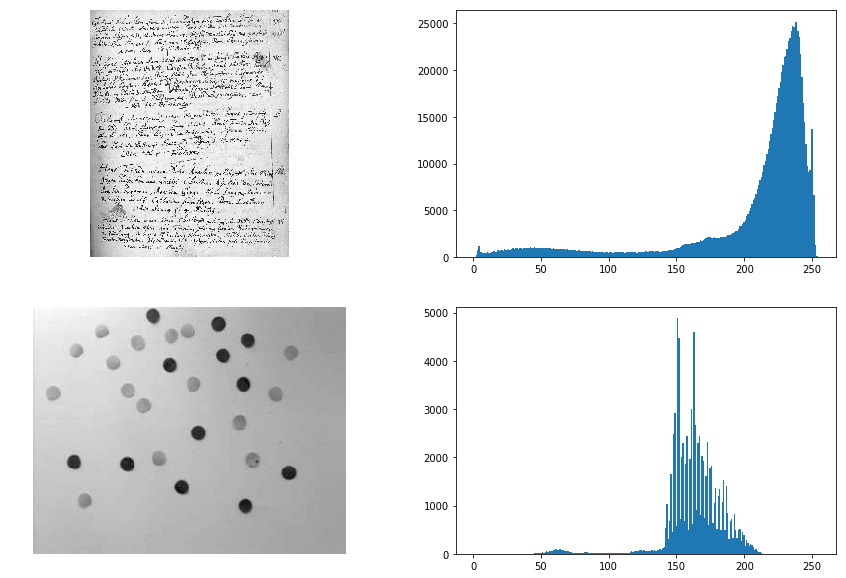

In [5]:
# Run this cell to get an impression of how the histograms look

%matplotlib inline
import matplotlib.pyplot as plt

# plt.imread reads pngs as float and jpg as uint8
img1 = plt.imread('images/schrift.png')*255
img2 = plt.imread('images/pebbles.jpg') 

plt.figure(figsize=(15, 10)) 
plt.gray()
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(2,2,2)
plt.hist(img1.flatten(), 256, (0, 255))
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(img2)
plt.subplot(2,2,4)
plt.hist(img2.flatten(), 256, (0, 255))
plt.show()

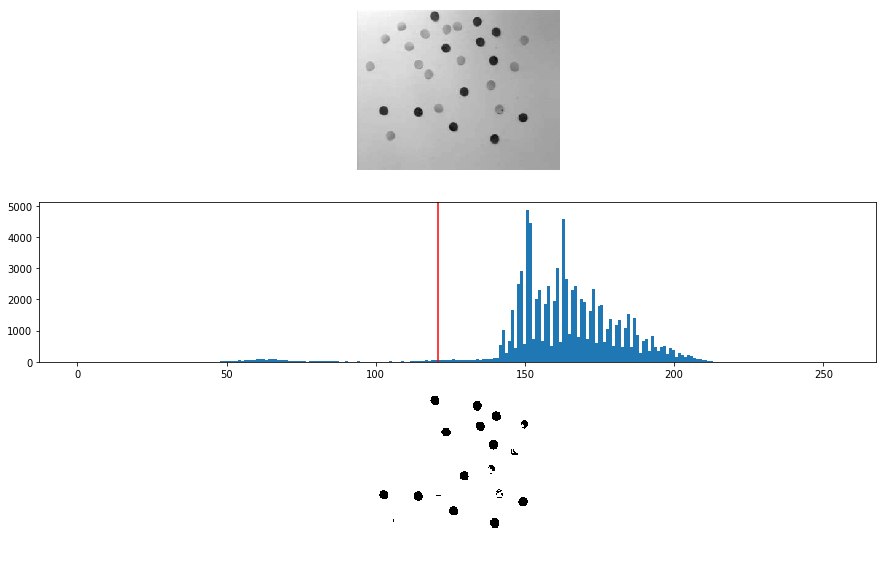

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

img = plt.imread('images/pebbles.jpg') # 'pebbles.jpg' or 'schrift.png' using * 255 as above

# BEGIN SOLUTION
from skimage.filters import threshold_otsu
thresh = threshold_otsu(img)
segments = img > thresh
# END SOLUTION

plt.figure(figsize=(15, 10))
plt.gray()
plt.subplot(3,1,1); plt.axis('off'); plt.imshow(img)
plt.subplot(3,1,2); plt.hist(img.flatten(), 256, (0,255))
plt.axvline(thresh, color='r')
plt.subplot(3,1,3); plt.axis('off'); plt.imshow(segments)
plt.show()

### c) Shading

Shading may cause a problem to histogram based segmentation. In the lecture (CV-07 slide 13), it was proposed to compute a shading image to deal with that problem. Apply this approach to the images `schrift.png` and `pebbles.jpg`. You may use filter functions from scikit-image for this exercise.

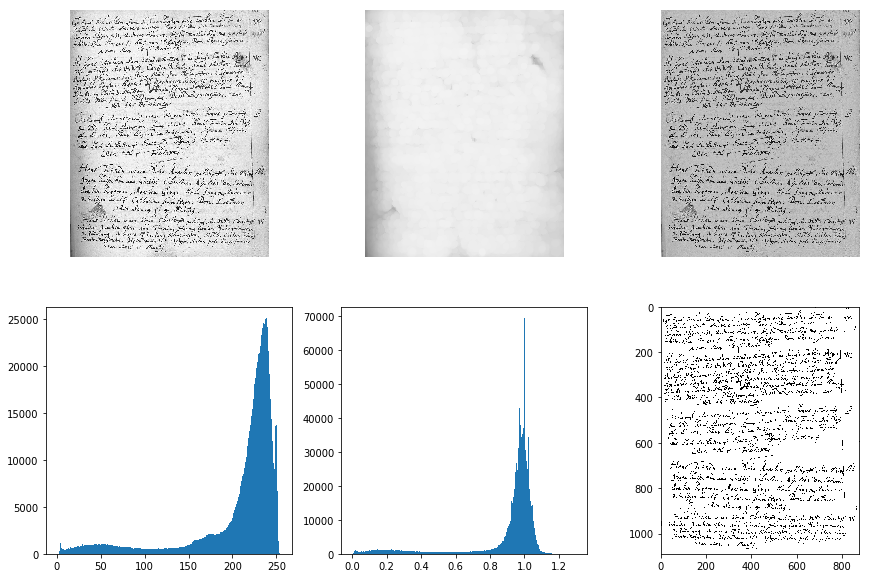

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/schrift.png')
#img = plt.imread('images/pebbles.png')

## BEGIN SOLUTION
# from scipy.ndimage.filters import maximum_filter, uniform_filter
from skimage.filters import rank
from skimage.morphology import disk

plt.figure(figsize=(15, 10))
plt.gray()
plt.subplot(2,3,1); plt.axis('off'); plt.imshow(img)

plt.subplot(2,3,2); plt.axis('off')
#img_bg = maximum_filter(img_bw,13)
img_bg = rank.maximum(rank.mean(img, disk(5)), disk(13))/255.0
# img_bg = maximum_filter(uniform_filter(img, 5), 13)
plt.imshow(img_bg, vmin=0, vmax=1)

img_corrected = img / img_bg
plt.subplot(2,3,3); plt.axis('off')
plt.imshow(img_corrected)

# show histograms
img = img*255   # ONLY IF working with .png files
plt.subplot(2,3,4); plt.hist(img.flatten(),256,(0,255))
plt.subplot(2,3,5); plt.hist(img_corrected.flatten(),256,(0,1.3))

# show result
plt.subplot(2,3,6); plt.imshow(img_corrected > 0.5)
plt.show()
## END SOLUTION

## Assignment 2: Pyramid representation [3 Points]

**a)** What is the *Gaussian pyramid*? How does the **reduce** operation work? Explain in your own words what low pass filtering is and why it should be used when building the pyramid? Implement the **reduce** operation and generate a figure similar to the one on (CV-07 slide 32).

A Gaussian pyramid is a multiscale representation, where the different scales are gained by applying Gaussian smoothing with different standard deviations $\sigma$. Such a pyramid is usually divided in octaves, where one octave means doubling the parameter $\sigma$. The most simple case, that is also depicted in (CV-07 slide 32), only uses the full octaves, while more general approaches also introduce intermediate levels in each octave. Applying the Gaussian kernel acts as a low pass filter, i.e. only low frequencies will be kept while higher frequencies are cut off. Hence at the higher octaves, no details of the image are left on only large structures will remain visible. Hence it is common practice, to also resize the images in such a pyramid at every octave.

In [ ]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

img = plt.imread('images/mermaid.png')

pyramid_image = img.copy() # change this!

# BEGIN SOLUTION
# create a 2D-kernel for smoothing
kernel = (1 / 16) * np.array([[0.87,3.91,6.44,3.91,0.87]])
kernel = kernel.T.dot(kernel)

def reduce(img, kernel):
    """Smoothes and subsamples image resulting in image of half the size
    
    Args:
        img (ndarray): Input image
        kernel (ndarray): Smoothing kernel.
    
    Returngs:
        img (ndarray): Input image reduced to half the size.
    """
    # the reduce operation is a combination of smoothing ...
    img = ndimage.convolve(img, kernel)
    # ... and subsampling (resizing)
    img = img[::2, ::2]
    return img

while min(img.shape) > 1:
    img = reduce(img, kernel)
    # now insert the resulting octave into the final image for visualization
    pyramid_image[ img.shape[0] + 1, :img.shape[1] + 1] = 0
    pyramid_image[:img.shape[0] + 1,  img.shape[1] + 1] = 0
    pyramid_image[:img.shape[0],     :img.shape[1]    ] = img
# END SOLUTION

plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

**b)** What is the **expand** operation? Why can the **reduce** operation not be inverted? Implement the **expand** operation and generate an image similar to the one on (CV-07 slide 34).

The expand operation aims to reconstruct an image from an image at higher scale. While a perfect reconstruction would be possible in a continous setup, it is not possible with our reduce operation that subsamples at every octave and thereby looses information. When implementing the expand operation, one has to undo this subsampling. Although this is not possible, one can get a good approximation by using different formulae to compute pixels at even and odd coordinates: this yield for different cases: even/even, even/odd, odd/even, and odd/odd. The solution presents two different ways to deal with this situation: (1) `expand1()` uses four different 2D-kernels to compute the different cases. (2) `expand2()` uses two 1D-kernels and applies them twice, first vertically and then horizontally.

In [ ]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

img = plt.imread('images/mermaid.png')


steps = 4
pyramid_image = np.zeros((img.shape[0] + (2 ** steps), img.shape[1] + (2 ** steps)))
# BEGIN SOLUTION

assert 'kernel' in globals(), "You should run part b) before part c) to define reduce!"

# two 1D-kernels for expand:
kernel1 = (1 / 8.28) * np.array([[0.87, 6.44, 0.87]])
kernel2 = (1 / 7.82) * np.array([[3.91, 3.91]])


def expand1(img, kernel1, kernel2):
    """Expands image using 2D kernels
    
    Args:
        img (ndarray): Input image.
        kernel1 (1d ndarray): First kernel.
        kernel2 (1d ndarray): Second kernel.
    
    Returns:
        result (ndarray): The expanded image.
    """
    # the reduce operation has to distinguis even and odd columns/rows
    result = np.empty((img.shape[0]*2,img.shape[1]*2))
    result[ ::2,   ::2] = ndimage.convolve(img, kernel1.T.dot(kernel1))
    result[ ::2,  1::2] = ndimage.convolve(img, kernel1.T.dot(kernel2))
    result[1::2,   ::2] = ndimage.convolve(img, kernel2.T.dot(kernel1))
    result[1::2,  1::2] = ndimage.convolve(img, kernel2.T.dot(kernel2))
    return result

# alternative implementation: 
def expand2(img, kernel1, kernel2):
    """Expands image using 1D kernels
    
    Args:
        img (ndarray): Input image.
        kernel1 (1d ndarray): First kernel.
        kernel2 (1d ndarray): Second kernel.
    
    Returns:
        result (ndarray): The expanded image.
    """
    temp = np.empty((img.shape[0]*2, img.shape[1]))
    temp[ ::2, :] = ndimage.convolve(img, kernel1.T)
    temp[1::2, :] = ndimage.convolve(img, kernel2.T)

    result = np.empty((temp.shape[0], temp.shape[1]*2))  
    result[:,  ::2] = ndimage.convolve(temp, kernel1)
    result[:, 1::2] = ndimage.convolve(temp, kernel2)
    return result

for _ in range(steps):
    img = reduce(img, kernel)
    
pyramid_image[:img.shape[0], :img.shape[1]] = img
for _ in range(steps):
    img = expand1(img, kernel1, kernel2)
    pyramid_image[((img.shape[0] // 2) + 1):img.shape[0], :img.shape[1]] = img[img.shape[0] // 2 + 1:, :]
    pyramid_image[:img.shape[0], (img.shape[1] // 2 + 1):img.shape[1]] = img[:, img.shape[1] // 2 + 1:]

# END SOLUTION

plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

## Assignment 3: Texture Segmentation [5 Points]

**a)** What is texture? Try to define it in your own words. Can there be a standard definition? What problems do you expect for texture based segmentation? 

Texture refers to a common property in the destribution of gray values or color in a region. Two regions have the same texture, if they agree in that property. That is not a hard definition, but rather a description of the general idea. It can be fleshed out and made more precise by providing a formal specification of the properties, which can be based on different grounds, e.g. based on structural, stochastic, or spectral aspects. However, the suitability of a definition depends on the context: what is texture in one context can be content in another one. Hence one should not expect a general definition that fits for all applications.

Texture is usually not defined for individual pixels but for larger structures. When applied as a homogeneity criterion for region based segmentation, one has to take larger neighborhoods into account. As the segment boundaries are not known in advance (otherwise segmentation would be unnecessary), for boundary pixels such an approach will consider values from multiple segments and hence lead to inconclusive results for such pixels. It is also unsuitable to discover small segments.

**b)** What is a co-occurence matrix? How can it be used to characterize texture?

The co-occurence matrix represents the correlation between pixels. Although the computation of co-occurence values can be defined quite generally, one usually only considers correlations over small distances, i.e., considering only neighboring pixels. If the correlation over larger distances is to be detected, one usually applies multi-scale strategies, i.e. resize the image and then apply the neighbor-pixel version. The matrix then holds the number of gray value combinations of such pixels for all pairs of gray values between for a selected region of the image. From that matrix, some more compact features, like energy, contrast, entropy, etc. can be computed that allow to characterize different textures.


**c)** Implement a function to compute the co-occurence matrix of an image (patch). Apply it and compare your results to (CV-07 slide 54).

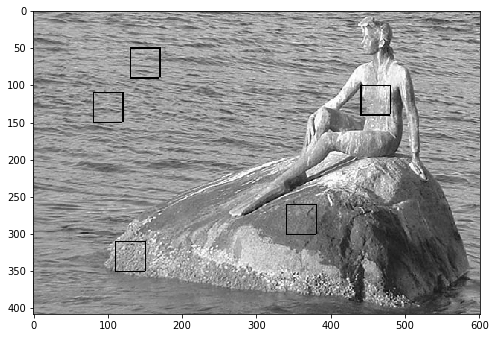

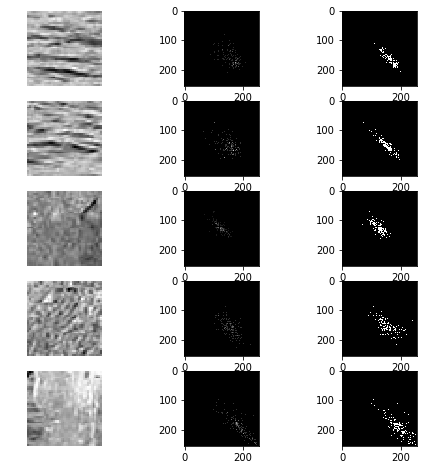

In [8]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import imageio 

img = imageio.imread('images/mermaid.png')#, mode='L')

def get_patch(img, x, y, size=40):
    """
    Extract a rectangular patch from an image and mark it in the original image.
    
    Args:
        img (nndarray): Input image.
        x (uint): X-coordinate.
        y (uint): Y-coordinate.
        size (uint): Size of the patch.
        
    Returns:
        result: The extracted patch.
    """
    result = img[x:x+size,y:y+size].copy()
    img[x:x+size, [y,y+1,y+size,y+size+1]] = 0
    img[[x,x+1,x+size,x+size+1], y:y+size] = 0
    return result

patches = []
patches.append(get_patch(img, 50,130))
patches.append(get_patch(img, 110,80))
patches.append(get_patch(img, 260,340))
patches.append(get_patch(img, 310,110))
patches.append(get_patch(img, 100,440))


def cooccurrence(img, dx=1, dy=1):
    """
    Compute a co-occurence matrix for the given image.
    
    Args:
        img          the grayscale image (uint8)
        dx,dy        the offset between the two reference points

    Returns:
        matrix       the co-occurence matrix
    """
    matrix = np.empty((256, 256))
    # BEGIN SOLUTION
    for g1, g2 in np.ndindex(matrix.shape):
        matrix[g1, g2] = np.sum(
            (img[:img.shape[0] - dy, :img.shape[1] - dx] == g1) & (img[dy:, dx:] == g2)
        ) 
    matrix /= img.size 
    return matrix


# Alternative solution:
def cooccurrence2(img, dx=1, dy=1):
    """
    Compute a co-occurence matrix for the given image.
    
    Args:
        img          the grayscale image (uint8)
        dx,dy        the offset between the two reference points

    Returns:
        matrix       the co-occurence matrix
    """
    matrix = np.zeros((256,256))
    for r,c in np.ndindex((img.shape[0] - dy, img.shape[1] - dx)):
        matrix[img[r, c], img[r + dy, c + dx]] += 1
    matrix /= img.size
    
    # END SOLUTION
    return matrix


plt.figure(figsize=(8, 8))
plt.gray()
plt.imshow(img)
plt.show()


plt.figure(figsize=(8, 8))
i = 0
for p in patches:
    plt.subplot(len(patches),3,i+1); plt.axis('off'); plt.imshow(p)
    # For visualization one may apply some extra me, e.g., logarithmization or binarization
    plt.subplot(len(patches),3,i+2); plt.imshow(np.log(1 + cooccurrence2(p, 0, 1)), interpolation='none')
    plt.subplot(len(patches),3,i+3); plt.imshow(cooccurrence2(p,1,0)>0, interpolation='none')
    i += 3
plt.show()

## Assignment 4: Region merging [5 Points]

Implement the *region merging* algorithm (CV-07 slide 39) and apply it to the image `segments.png` (or some part of it). Use a simple *homogeneity condition*, e.g. that the maximal difference between gray values in a segment is not larger than a given threshold.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio
import warnings
warnings.filterwarnings('ignore')

img = imageio.imread('./images/segments.png', pilmode='L')
# Choosing a large image region lengthens computation time
img = img[64:128,64:128]

# compute the `label` array by implementing "region merging"
# BEGIN SOLUTION

# Initialize the region adjacency graph (RAG).
# Such a graph consists of nodes and edges:
#   - each node will be identifed by a unique label (integer number).
#   - edges will be computed on the fly: neighboring pixel with different label will constitute an edge.
# In the beginning, each pixel will be a segment, i.e. a node in the RAG:
label = np.random.permutation(img.size).reshape(img.shape)
print("Initialization from image with shape {}: {} segments (=pixels)".format(img.shape, label.size))

# We also introduce two auxiliary arrays to hold the minimum and maximum gray value in each region:
minval = img.copy()
maxval = img.copy()


# Define a homgeneity criterion:
# A region will be considered homogenous, if its minimal and maximal grayvalues do not differ more than
# a given threshold.
def homogenous(coords, threshold):
    """
    Check if two regions, identified by two (neighboring) coordinate pairs, together fulfill the
    homogeneity criterion.
    
    This function makes use of the global auxiliary arrays 'maxval' and 'minval'.
    
    Args: 
        coords (list): List of coordinate tuples.
        threshold (float): Maximum allowed distance between min and max values at positions given in coords.
        
    Returns:
        (bool): True, if homogenous; else false.
    """
    print(coords.type)
    print(threshold)
    return max(maxval[coords]) - min(minval[coords]) <= threshold


def merge(coords):
    """
    Merge two regions. The regions are identified by two coordinates, providing points in these regions.
    This function will adapt the global array 'label' to reflect the merge. It will also update the
    auxiliary arrays 'minval' and 'maxval' accordingly.
    
    Args:
        coords (list): List of two coordinate tuples.
        
    Returns:
    
    """
    # Get the labels for their regions to be merged.
    l1, l2 = label[coords]
    
    # get the indices of all pixels belonging to the merged region
    r = (label == l2) | (label == l1)
    
    # set all labels in the merged region to label l1
    label[r] = l1
    
    # also update the auxiliary array.
    minval[r] = min(minval[coords])
    maxval[r] = max(maxval[coords])



# Perform region merging: 
# At each iteration merge regions that fulfill the homogeneity condition for a given threshold
# (max_diff = maximal difference between gray values in merged region)
for max_diff in range(0, 80, 5):

    # Horizontal:
    for i in np.argwhere(label[:, :-1] != label[:, 1:]):
    
        coords = [c for c in zip(i, i + (0, 1))]
        if homogenous(coords, max_diff):
            pass
            merge(coords)
    print("After horizontal merge (threshold = {}): {} segments.".format(max_diff,np.unique(label).size))

    # Vertical:
    for i in np.argwhere(label[:-1,:] != label[1:,:]):
        coords = [c for c in zip(i,i + (1,0))]
        if homogenous(coords, max_diff):
            merge(coords)
    print("After vertical merge (threshold = {}): {} segments.".format(max_diff,np.unique(label).size))

# END SOLUTION

plt.figure(figsize=(12, 12))
plt.gray()
plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(label, cmap='prism')
plt.show()


warnings.filterwarnings('ignore')

Initialization from image with shape (64, 64): 4096 segments (=pixels)


AttributeError: 'list' object has no attribute 'type'

## Assignment 5: Painting with a webcam using color detection [2 points]


### Testing your webcam

From now on we will try to make the exercises a bit more interactive and use live feed from your webcam. Unfortunately, using the webcam may not always work out of box (depending on your hardware/os configuration). So first make sure that you can grab an image from the webcam. There are essentially two methods available:
1. use the `cv2` library (opencv will use `gstreamer`)
1. use the `imageio` library (this will use the `ffmpeg` program which has to be installed on your computer)

Try out if any of those methods works for you:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set this flag to either use "imageio" or "cv2"
use_imageio = False
if use_imageio:
    # use imageio for accessing the webcam (requires ffmpeg to be installed on your computer)
    import imageio
    try:
        reader = imageio.get_reader('<video0>')
        img = reader.get_next_data()
        ok = True
        reader.close()
    except:
        ok = False
else:
    # use opencv for accessing the webcam
    import cv2
    camera = cv2.VideoCapture(0)
    ok, img = camera.read()
    camera.release()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

if ok:
    plt.imshow(img)
    plt.show()
else:
    print("Accessing your webcam failed.")

### Introducing cvloop

To make things even more interesting, we will enable you to see the algorithms in live action. For that purpose we use the package `cvloop`. To install it first source your cv environment and then run the follwing cell

In [ ]:
!pip install cvloop

Check that it works by executing the cell below:

In [ ]:
from cvloop import cvloop
cvl = cvloop(function=lambda frame: 255 - frame, side_by_side=True)

### a)
In this task we will track a small colored object (like the cap of a pen) in front of a neutral background of a different color. We will use the location of the object to paint on a virtual canvas. For that you have to implement the following tasks in the `draw_func` function:

* Convert the image `img` given to the `draw_func` into HSV color space. You may use the OpenCV function `cvtColor`. Note: In OpenCV BGR and not RGB is the standard color space.
* Measure the color of your object. You may return the converted image and interactively measure the color with your mouse. Define your measured hue value in a constant
* Discard all channel except the hue channel. 
* Find the location with the most similar hue to the measured hue of your object. You may cast your `uint8` image to `int16`
to allow negative values
* Paint for example a circle at this position in `img_draw`.

Use OpenCV functions to find minima, draw circles, etc.

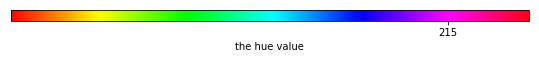

In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Adapt this hue value to the hue of your object
hue = 215

# A global canvas to draw on
canvas = np.zeros((480,640,3), np.uint8) 

# radius and color of the marker
radius = 5
color = (255,255,255)

def draw_func(img):
    """
    Draw a circle on img_draw at the detected object location.
    
    Args:
        img          the BGR input image (uint8)

    Returns:
        img_draw     img with circle drawn at postion of object
    """
    global canvas, hue, radius, color
    
    # BEGIN SOLUTION
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # convert to int16 to allow negative values
    hue_channel = np.int16(img_hsv[...,0])
    img_diff1 = np.abs(hue_channel - hue)
    img_diff2 = 256 - np.abs(hue_channel - hue)
    img_diff = np.minimum(img_diff1, img_diff2)
    #
    mask = np.logical_and(img_hsv[...,1]>150, img_hsv[...,2]>100).astype(np.int)
    print(mask.dtype, img_diff.shape, mask.shape)
    minloc = cv2.minMaxLoc(img_diff - img_hsv[...,1] - img_hsv[...,2])[2]
    cv2.circle(canvas, minloc, radius, color, thickness=-1)
    
    # END SOLUTION
    return canvas

# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(8, 1))
ax = fig.add_axes([0.05, 0.80, 0.9, 0.15])
cb = mpl.colorbar.ColorbarBase(ax, cmap=mpl.cm.hsv, orientation='horizontal',
                               norm=mpl.colors.Normalize(vmin=0, vmax=255))
cb.set_ticks([hue])
cb.set_label('the hue value')
plt.show()

In [ ]:
# First test your function with single image and without cvloop (cvloop does not output or error messages
# raised in the callback function). You may either grab an image from your webcam (as described above),
# or choose an arbitrary image from wherever you like

%matplotlib inline
import matplotlib.pyplot as plt

draw_func(img)
plt.subplot(1,2,1); plt.imshow(img)
plt.subplot(1,2,2); plt.imshow(canvas)
plt.show()

In [ ]:
# Now run your function from within cvloop:

%matplotlib notebook
from cvloop import cvloop

# Now use cvloop to run the algorithm live on webcam data     
cvl = cvloop(function=draw_func, side_by_side=True)